In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [26]:
X, y = make_blobs(200, 2, centers=2, random_state=0, cluster_std=4.5)
X += 100

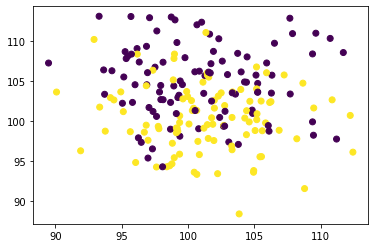

In [27]:
plt.scatter(X[:,0], X[:,1], c=y)

In [28]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

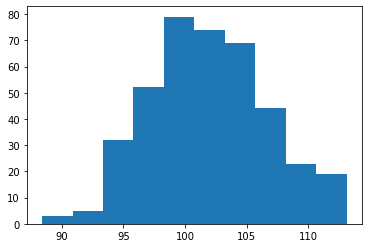

In [30]:
plt.hist(X.flatten());

In [31]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.675


,0,1
0,12,10
1,3,15


In [32]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.45


,0,1
0,0,22
1,0,18


In [33]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.6


,0,1
0,10,12
1,4,14


In [34]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.675


,0,1
0,12,10
1,3,15


In [35]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.75


,0,1
0,15,7
1,3,15


### Klasyfikacja tekstu spam/nie-spam z wykorzystaniem NB

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
sentences = ["Julia kocha Marka","Marek kocha Annę","Anna i Julia kochają Marka"]

In [39]:
cvec = CountVectorizer()
wm = cvec.fit_transform(sentences)
wm

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [40]:
cvec.get_feature_names()

['anna', 'annę', 'julia', 'kocha', 'kochają', 'marek', 'marka']

In [42]:
pd.DataFrame(wm.toarray(), columns=cvec.get_feature_names())

,anna,annę,julia,kocha,kochają,marek,marka
0,0,0,1,1,0,0,1
1,0,1,0,1,0,1,0
2,1,0,1,0,1,0,1


In [46]:
df = pd.read_csv("http://51.91.120.89/extras/SMSSpamCollection.csv", sep="\t", header=None, names=["label","text"])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [48]:
df.label = df.label.map({"ham":0, "spam":1})
df.head(3)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [49]:
pd.set_option("max_colwidth", None)

In [50]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [53]:
df["text_clear"] = df.text.str.replace("[^\w\s]", "")
df.head()

C:\Users\kurs\AppData\Local\Temp/ipykernel_7780/3340007798.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text_clear"] = df.text.str.replace("[^\w\s]", "")


,label,text,text_clear
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


In [67]:
df.text_clear = df.text_clear.str.replace("[0-9]","") # tymczasowo nie

C:\Users\kurs\AppData\Local\Temp/ipykernel_7780/2381255514.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text_clear = df.text_clear.str.replace("[0-9]","") # tymczasowo nie


In [69]:
cvec = CountVectorizer()

In [70]:
cvec.fit(df.text_clear) # budujemny leksykon
wm = cvec.transform(df.text_clear)

In [71]:
wm.shape

(5572, 8609)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(wm.toarray(), df.label, test_size=0.2, random_state=0)

In [82]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.9031390134529148


,0,1
0,862,93
1,15,145


In [83]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.97847533632287


,0,1
0,953,2
1,22,138


In [84]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.9713004484304932


,0,1
0,930,25
1,7,153


In [85]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.9237668161434978


,0,1
0,954,1
1,84,76


### Weryfikacja działania

In [86]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.9713004484304932


,0,1
0,930,25
1,7,153


In [87]:
txt = "extra promo buy now"
sample = cvec.transform([txt])
model.predict(sample), model.predict_proba(sample)

(array([1], dtype=int64), array([[0.40291476, 0.59708524]]))

In [88]:
txt = "please call me now"
sample = cvec.transform([txt])
model.predict(sample), model.predict_proba(sample)

(array([0], dtype=int64), array([[0.78860876, 0.21139124]]))

In [89]:
# drzewo decyzyjne
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.9506726457399103


,0,1
0,938,17
1,38,122


In [90]:
# reg log
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.9829596412556054


,0,1
0,951,4
1,15,145
